In [191]:
import numpy as np
import numpy
numpy.set_printoptions(threshold=numpy.nan)

In [192]:
import scipy.io
mat = scipy.io.loadmat('DadosLista4.mat')

In [193]:
dados = np.array(mat['Dados'])
y = np.array(mat['y'])

In [194]:
sizeDados = len(dados)
dados1, dados2, dados3 = dados[ : int((sizeDados/3))] , dados[int((sizeDados/3)) : int((2*sizeDados/3)) ], dados[ int((2*sizeDados/3)) : ]
y1, y2, y3 = y[ : int((sizeDados/3))] , y[int((sizeDados/3)) : int((2*sizeDados/3)) ], y[ int((2*sizeDados/3)) : ]

In [195]:
#Classe 1 treino
randomTreino1 = np.random.choice(dados1.shape[0], 200, replace=False)
dadosTreino1 = dados1[randomTreino1]
yTreino1 = y1[randomTreino1]

#Classe 1 treino
randomTreino2 = np.random.choice(dados2.shape[0], 200, replace=False)
dadosTreino2 = dados2[randomTreino2]
yTreino2 = y2[randomTreino2]

#Classe 1 treino
randomTreino3 = np.random.choice(dados3.shape[0], 200, replace=False)
dadosTreino3 = dados3[randomTreino3]
yTreino3 = y3[randomTreino3]



In [196]:
#Classe 1 teste
a1_rows = set(map(tuple, dados1))
a2_rows = set(map(tuple, dadosTreino1))
dadosTeste1 = np.array(list(a1_rows.difference(a2_rows)))
yTeste1 = np.ones((300,1))

#Classe 2 teste
a1_rows = set(map(tuple, dados2))
a2_rows = set(map(tuple, dadosTreino2))
dadosTeste2 = np.array(list(a1_rows.difference(a2_rows)))
yTeste2 = np.full((300,1), 2)

#Classe 3 teste
a1_rows = set(map(tuple, dados3))
a2_rows = set(map(tuple, dadosTreino3))
dadosTeste3 = np.array(list(a1_rows.difference(a2_rows)))
yTeste3 = np.full( (300,1), 3)


In [197]:
dadosTreino = np.concatenate((dadosTreino1, dadosTreino2, dadosTreino3), axis=0)
len(dadosTreino)

600

In [198]:
dadosTeste = np.concatenate((dadosTeste1, dadosTeste2, dadosTeste3), axis=0)
len(dadosTeste)

900

In [199]:
yTreino = np.concatenate((yTreino1, yTreino2, yTreino3), axis=0 )
len(yTreino)

600

In [200]:
yTeste = np.concatenate( (yTeste1, yTeste2, yTeste3), axis=0)
len(yTeste)

900

In [201]:
#calcula mi
miGeral = dadosTreino.mean(axis=0)
mi1 = dadosTreino1.mean(axis=0)
mi2 = dadosTreino2.mean(axis=0)
mi3 = dadosTreino3.mean(axis=0)

In [202]:
#somatorio
n1 = dadosTreino1.shape[0]
n2 = dadosTreino2.shape[0]
n3 = dadosTreino3.shape[0]
nGeral = dadosTreino.shape[0]

sum1 = []
for linha in range(n1):
    aux1 = np.reshape( (dadosTreino1[linha] - mi1), (2,1))
    aux1T = np.transpose(np.reshape( (dadosTreino1[linha] - mi1), (2,1)))
    sum1.append(aux1.dot(aux1T))
    
sum1 = np.sum(np.array(sum1), axis=0)

ec1 = sum1 / (n1 - 1)

sum2 = []
for linha in range(n2):
    aux2 = np.reshape( (dadosTreino2[linha] - mi2), (2,1))
    aux2T = np.transpose(np.reshape( (dadosTreino2[linha] - mi2), (2,1)))
    sum2.append(aux2.dot(aux2T))
    
sum2 = np.sum(np.array(sum2), axis=0)

ec2 = sum2 / (n2 - 1)

sum3 = []
for linha in range(n3):
    aux3 = np.reshape( (dadosTreino3[linha] - mi3), (2,1))
    aux3T = np.transpose(np.reshape( (dadosTreino3[linha] - mi3), (2,1)))
    sum3.append(aux3.dot(aux3T))
    
sum3 = np.sum(np.array(sum3), axis=0)

ec3 = sum3 / (n3 - 1)

sumGeral = []
for linha in range(nGeral):
    auxGeral = np.reshape( (dadosTreino[linha] - miGeral), (2,1))
    auxGeralT = np.transpose(np.reshape( (dadosTreino[linha] - miGeral), (2,1)))
    sumGeral.append(auxGeral.dot(auxGeralT))
    
sumGeral = np.sum(np.array(sumGeral), axis=0)

ecGeral = sumGeral / (nGeral - 1)


In [203]:
print("--------")
print("Mi Geral:")
print(miGeral)
print("Mi 1:")
print(mi1)
print("Mi 2:")
print(mi2)
print("Mi 3:")
print(mi3)
print("--------")
print("Sigma C1:")
print(ec1)
print("Sigma C2:")
print(ec2)
print("Sigma C3:")
print(ec3)
print("Sigma Geral:")
print(ecGeral)

--------
Mi Geral:
[ 0.50601519  0.70608994]
Mi 1:
[ 0.71110102  0.50281391]
Mi 2:
[ 0.60305556  0.59983851]
Mi 3:
[ 0.20388899  1.0156174 ]
--------
Sigma C1:
[[ 0.03686004  0.01615628]
 [ 0.01615628  0.03921703]]
Sigma C2:
[[ 0.00769119 -0.00086351]
 [-0.00086351  0.00728187]]
Sigma C3:
[[ 0.00837523  0.00169345]
 [ 0.00169345  0.0094618 ]]
Sigma Geral:
[[ 0.06524845 -0.04294316]
 [-0.04294316  0.06814646]]


In [204]:
import math
#Probabilidade de x para a classe C referente ao mi e ec(sigma) => P(x|c)
def prob(mi, ec, x):
    
    # (x - miC)T
    matrixT = np.transpose(np.reshape( (x - mi), (2,1)))
    # (x -miC)T * SigmaC
    aux = matrixT.dot(np.linalg.inv(ec))
    # (x -miC)T * SigmaC * (x- miC)
    final = aux.dot(np.reshape((x - mi), (2,1)))
    # exp( -1/2 * (x -miC)T * SigmaC * (x- miC) )
    result = np.exp( (-1/2) * final)
    delta = 1 / math.sqrt(((2*np.pi)**2)* np.linalg.det(ec))
    #print(result)
    resultado = delta * result
    return resultado * 0.333

In [205]:
#Funcao que define qual das 3 probabilidades foi a maior
def maxY(y1, y2, y3):
    if y1 >= y2 and y1 >= y3:
        return 1
    elif y2 >= y3 :
        return 2
    else:
        return 3

In [206]:
yResults = []
for dadoLinha in dadosTeste :
    y1 = prob(mi1, ec1, dadoLinha)
    y2 = prob(mi2, ec2, dadoLinha)
    y3 = prob(mi3, ec3, dadoLinha)
    yResults.append(maxY(y1,y2,y3))
    

In [207]:
from sklearn.metrics import confusion_matrix

In [208]:
matrix = confusion_matrix(yTeste, yResults)

In [209]:
import matplotlib.pyplot as plt

In [210]:
def plotConfusionMatrix(conf_arr, method):
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    width, height = conf_arr.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    cb = fig.colorbar(res)
    alphabet = '123'
    plt.xticks(range(width), alphabet[:width])
    plt.yticks(range(height), alphabet[:height])
    plt.savefig('confusion_matrix'+method+'.png', format='png')
    plt.show()

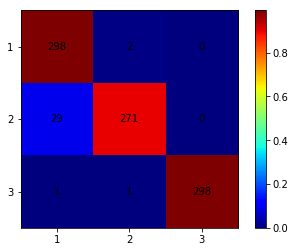

In [211]:
plotConfusionMatrix(matrix, 'Naive')

In [212]:
def only_diagonal(ec):
    lines = ec.shape[0]
    cols = ec.shape[1]
    for i in range(lines):
        for c in range(cols):
            if i != c:
                ec[i][c] = 0
    return ec

In [213]:
#é só apagar as linhas q n são da diagonal principal da matriz de covariancia
ecDQG1 = only_diagonal(ec1)
ecDQG2 = only_diagonal(ec2)
ecDQG3 = only_diagonal(ec3)
ecDQGGeral = only_diagonal(ecGeral)

In [214]:
import math
#Probabilidade de x para a classe C referente ao mi e ec(sigma) => P(x|c)
def probDQG(mi, ec, x):
    
    # (x - miC)T
    matrixT = np.transpose(np.reshape( (x - mi), (2,1)))
    # (x -miC)T * SigmaC
    aux = matrixT.dot(np.linalg.inv(ec))
    # (x -miC)T * SigmaC * (x- miC)
    final = aux.dot(np.reshape((x - mi), (2,1)))
    # exp( -1/2 * (x -miC)T * SigmaC * (x- miC) )
    result = np.exp( (-1/2) * final)
    delta = 1 / math.sqrt(((2*np.pi)**2)* np.linalg.det(ec))
    #print(result)
    resultado = delta * result
    return resultado * 0.333

In [215]:
yResultsDQG = []
for dadoLinha in dadosTeste :
    y1 = probDQG(mi1, ecDQG1, dadoLinha)
    y2 = probDQG(mi2, ecDQG2, dadoLinha)
    y3 = probDQG(mi3, ecDQG3, dadoLinha)
    yResultsDQG.append(maxY(y1,y2,y3))

In [216]:
matrixDQG = confusion_matrix(yTeste, yResultsDQG)

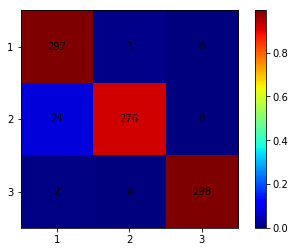

In [217]:
plotConfusionMatrix(matrixDQG, 'DQG')